# **Classification Prediction of K-medoids clusters of KC House Sale Data**
---------------------------------------------------------


# **1. Importer les bibliothèques nécessaires**

In [ ]:
! pip install scikit-learn-extra rdkit plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 64.0 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.23.5
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## **2. Charger la base de données kc-house**

In [ ]:
df=pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Dataset Information:**<a name ='Dataset'></a>
L'ensemble de données sur les ventes de maisons du comté de King contient des informations sur les maisons vendues au cours de la période d'un an allant de mai 2014 à mai 2015.

L'ensemble de données contient les informations suivantes :

| Features |  Description|
|----------------|------------------|
 |Id|            Unique Id for each house sold     |
|Date|         Date of House sale     |
|price |        House sale price     |
|bedrooms|   Number of bedrooms     |
|bathrooms|    Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower |
|sqft_living|    Square footage of interior living space of the house |
|sqft_lot|           Land area in square feet|
|floors|            Number of floors |
|waterfront|    Label to indicate whether the house was with waterfront or not|
|view|            Labels from 0 to 4 to indicate the view of house.|
|condition|     Labels from 1 to 5 to indicate the condition of the house|
|grade|            Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.|
|sqft_above|           Above ground level interior housing space in square feet. |
|sqft_basement| Below ground level interior housing space in square feet. |
|yr_built|            The year of construction of the house ranging from 1900 to 2015     |
|yr_renovated|    The year of last renovation of the house ranging from 1934 to 2015|
|zipcode | Zipcode area of the house|
|lat|   Latitude |
|long|  Longitude |
|sqft_living15| The interior living space in square feet for the nearest 15 neighbors|
|sqft_lot15| The land area in square feet for the nearest 15 neighbors |

## **3. Data Preprocessing** <a name = 'Preprocessing'></a>

**3.1 Afficher la description de la base de données.**

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**3.2 Afficher la taille de la DataFrame**

In [ ]:
df.shape

(21613, 21)

**3.3 suppression des valeurs aberrantes**

**- Afficher et interpréter le Boxplot de la colonne bedrooms**

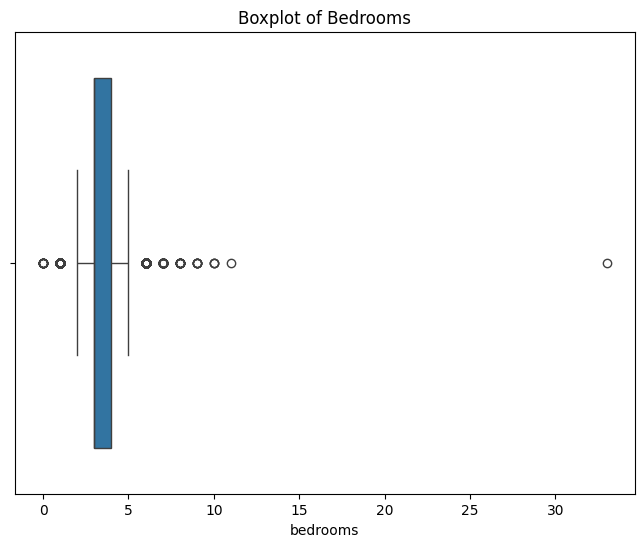

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', data=df)
plt.title('Boxplot of Bedrooms')
plt.show()

**- Identifier et supprimer les valeurs aberrantes d'une colonne en utilisant l'intervalle interquartile (IQR)**

In [ ]:
def remove_outliers_iqr(df, column):
  """Identifies and removes outliers from a specified column using the IQR method.

  Args:
    df: The pandas DataFrame.
    column: The name of the column to process.

  Returns:
    A new DataFrame with outliers removed.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

# Apply the function to the 'bedrooms' column
df = remove_outliers_iqr(df, 'bedrooms')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


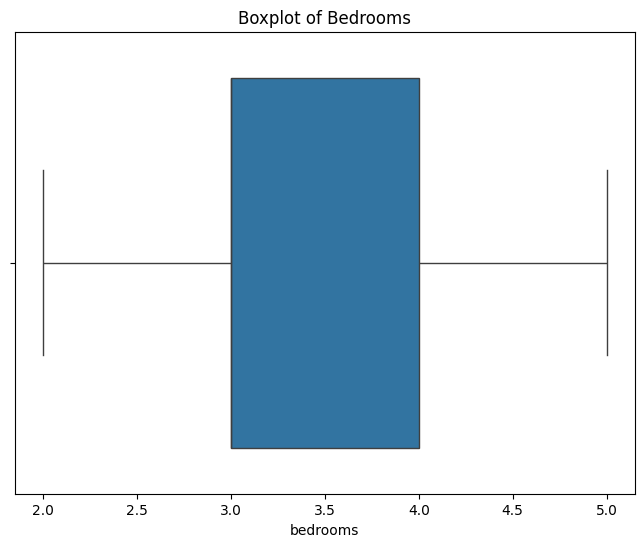

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', data=df)
plt.title('Boxplot of Bedrooms')
plt.show()

In [ ]:
df.shape

(21067, 21)

### **Vérification des valeurs manquantes**


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Choisir une méthode pour la gestion des valeurs manquantes  (sqt_above)

## **4. Génération de clusters K-medoids**<a name ='kmedoids'></a>

**` 4.1 Suppression des colonnes date et id`**

In [ ]:
df = df.drop(['date', 'id'], axis=1)

**Pourquoi supprime-t-on les colonnes date et id avant la standardisation ?**

La principale raison est de s'assurer que nous ne standardisons que les caractéristiques numériques pertinentes pour le clustering ou la modélisation. La standardisation implique généralement de centrer les données autour d'une moyenne nulle et de les mettre à l'échelle à une variance unitaire. Appliquer cela à des colonnes non informatives comme 'id' et 'date' peut fausser les résultats et rendre le clustering moins efficace

**4.2 Importation et création du StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

**4.3 Standardisation des données (fit_transform)**

In [ ]:
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.00568792, -0.39873715,  0.1756067 , ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.38158814, -0.39873715,  0.50022075, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.41794772]])

**4.4 Importater, créer et entraîner le modèle K-Medoids avec n_clusters=3 sur la base normalisée**

In [ ]:
from sklearn_extra.cluster import KMedoids
features = df.columns.tolist()

kmedoids = KMedoids(n_clusters=3, random_state=0)

### K-medoids

K-medoids est un algorithme de clustering **similaire à KMeans, avec quelques différences clés**.

Comme k-means, k-medoids vise à diviser l'ensemble de données en un nombre prédéfini de clusters « k ». Cependant, K-medoids utilise des *médoïdes* (c'est-à-dire le point de données le plus central de chaque cluster) au lieu de *centroïdes* comme point représentatif de chaque cluster.

- Cela rend K-medoids **plus robuste au bruit et aux valeurs aberrantes**, et lui permet de gérer des clusters non sphériques et non convexes.
- Le point central du cluster avec KMedoids doit être **un point de l'ensemble de données**, tandis que k-means utilise n'importe quel point dans l'espace.

Cette différence est illustrée ici :
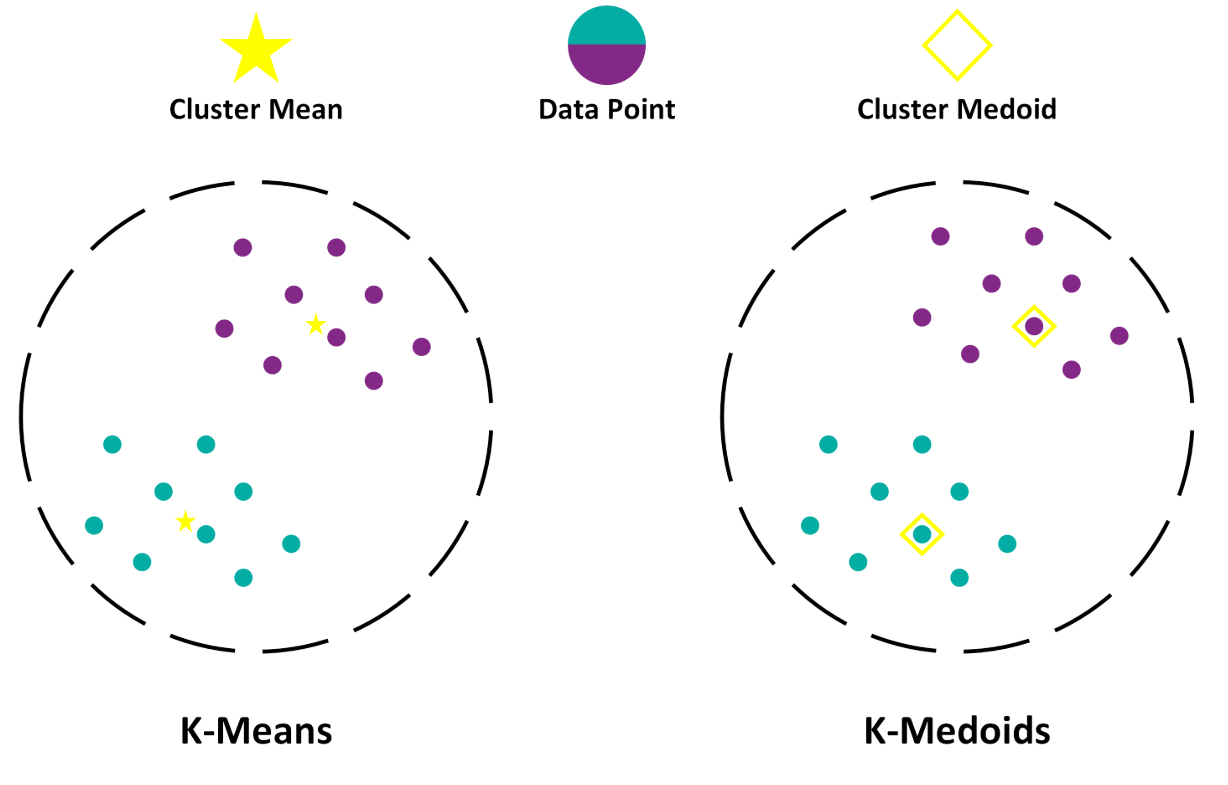

K-means utilise généralement la métrique de distance euclidienne, tandis que K-medoids fonctionne avec **n'importe quelle métrique de distance**, ce qui la rend plus polyvalente et adaptable à différents types d'ensembles de données.

#### Essayez différentes métriques de distance ici et voyez comment le clustering change !

Les options disponibles incluent

- euclidien
- jaccard
- cityblock
- cosinus
- l2
- minkowski

> Vous pouvez en savoir plus sur les mesures de distance ![ici](https://medium.com/geekculture/7-important-distance-metrics-every-data-scientist-should-know-11e1b0b2ebe3) et trouver toutes les options disponibles ![ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html).

In [ ]:
for column in features:
    df[column] = df[column].fillna(df[column].median())

kmedoids.fit(df[features])

KMedoids(n_clusters=3, random_state=0)

In [ ]:
kmedoids.labels_

array([1, 2, 1, ..., 1, 1, 1])

**4.5 Ajouter les étiquettes 'résultat du clustering) de clusters au DataFrame**

In [ ]:
df['cluster_labels'] = kmedoids.labels_

**4.6 Comment peut-on vérifier si n_clusters=3 est la valeur optimale pour notre clustering ?**

PS: from sklearn.metrics import pairwise_distances
diss = pairwise_distances(Clus_dataSet, metric="manhattan")

Réponse ici

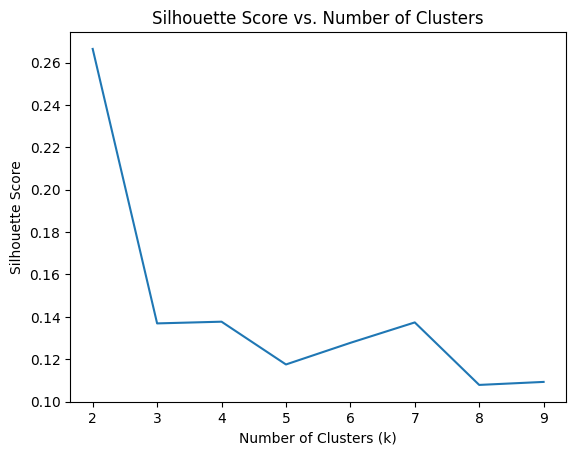

The best k value based on the silhouette score is 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn_extra.cluster import KMedoids
import pandas as pd


data_scaled_no_nan = pd.DataFrame(scaled_data).dropna().values

diss = pairwise_distances(data_scaled_no_nan, metric="manhattan")

silhouette_scores = []

for k in range(2, 10):

    kmedoids = KMedoids(n_clusters=k, metric="precomputed", random_state=0)
    kmedoids.fit(diss)

    labels = kmedoids.labels_

    n_labels = len(np.unique(labels))
    if n_labels > 1:
        silhouette_avg = silhouette_score(diss, labels, metric="precomputed")
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)

plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

best_k = np.argmax(silhouette_scores) + 2
print(f"The best k value based on the silhouette score is {best_k}")

### **Normaliser les données et former la division des tests**

La normalisation des données donne aux données une moyenne nulle et une variance unitaire (techniquement, elle doit être effectuée après la division des tests de formation)

In [ ]:
X = df.loc[:, df.columns != 'kmedoids Cluster Labels']
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cluster_labels
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.22832133,
        -0.915427  , -0.08717263, -0.30575946, -0.62918687, -0.55883575,
        -0.73468706, -0.65868104, -0.54489777, -0.21012839,  1.87015159,
        -0.35257175, -0.30607896, -0.9433552 , -0.26071541, -0.25190313],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434, -0.18988538,
         0.93650577, -0.08717263, -0.30575946, -0.62918687, -0.55883575,
         0.46085884,  0.2451414 , -0.6810785 ,  4.7466776 ,  0.87956753,
         1.16156823, -0.74634143, -0.43268619, -0.18786773,  1.12781871],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404, -0.12329847,
        -0.915427  , -0.08717263, -0.30575946, -0.62918687, -1.40958711,
        -1.22981213, -0.65868104, -1.29389179, -0.21012839, -0.9333882 ,
         1.28353661, -0.13565477,  1.07013975, -0.17237524, -0.25190313],
       [ 0.17409044,  0.67648506,  1.14944885, -0.13055006, -0.2440144 ,
        -0.915427  , -0.08717263, -0.30575946,  

In [ ]:
cluster_labels = df['kmedoids Cluster Labels']
cluster_labels.head()

,kmedoids Cluster Labels
0,-1
1,-1
2,-1
3,-1
4,-1


### **Graphique gaufré pour visualiser les propriétés du cluster K-medoids**

In [ ]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 67.8 MB/s eta 0:00:00


##### **Nombre de maisons dans chaque groupe**

In [ ]:
cluster_labels=df['kmedoids Cluster Labels']
cluster_labels.value_counts()

,count
kmedoids Cluster Labels,
-1,21613


##### **Prix de vente moyen des maisons de chaque groupe**

In [ ]:
import numpy as np
from pywaffle import Waffle
import seaborn as sns
import matplotlib.pyplot as plt

# Predict cluster labels using the kmedoids model if you haven't already
df['kmedoids Cluster Labels'] = kmedoids.fit_predict(scaled_data) # Assuming 'scaled_data' is your standardized data

num_clusters = len(df['kmedoids Cluster Labels'].unique())

# Filter values and labels to include only those present in the DataFrame
values = list(df['price'] / 10000) # Assuming 'price' is a column in your DataFrame


fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12, 8),
    rows=5,
    values=values,
    colors=tuple(sns.color_palette("husl", num_clusters)),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sticky-note',
    icon_size=18,
    icon_legend=True,
    title={'label': 'Average House Sale Price of each K-medoids Cluster', 'loc': 'center'},
    labels=list(df.groupby('kmedoids Cluster Labels')['price'].mean().round().astype(int))) # Group by the new column


plt.show()

ValueError: Input contains NaN.

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=0)

import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

scaled_data = scaler.fit_transform(df_imputed)

df['kmedoids Cluster Labels'] = kmedoids.fit_predict(scaled_data)

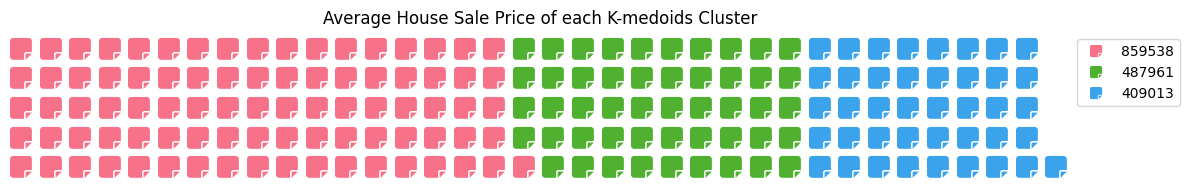

In [ ]:
from pywaffle import Waffle

# Ensure you are using the latest cluster labels assigned to your DataFrame
labels = df['kmedoids Cluster Labels']

num_clusters = len(np.unique(labels))

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12, 8),
    rows=5,
    values=list(df.groupby(labels)['price'].mean()/10000),
    colors=tuple(sns.color_palette("husl", num_clusters)),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sticky-note', icon_size=18,
    icon_legend=True,
    title={'label': 'Average House Sale Price of each K-medoids Cluster', 'loc': 'center'},
    labels=list(df.groupby(labels)['price'].mean().round().astype(int)))

plt.show()

In [ ]:
df.groupby(labels)['price'].mean().round().astype(int)

,price
kmedoids Cluster Labels,
0,859538
1,487961
2,409013
